In [74]:
import spacy
from spacy import displacy

* 오류 뜰때 : 

1. c++ 개발 패키지 있는지 확인
2. pydantic ==2.7.4 설치
3. python -m spacy download ko_core_news_sm

In [75]:
nlp = spacy.load('ko_core_news_sm')

In [76]:
doc = nlp('이것은 한국어로 된 문장입니다')

* token.text: 단어
* token.dep_: 의존관계 표기, 각각의 설명은 `spacy.explain('nsubj')`과 같은 코드로 확인 가능
* token.head: 지배소 (token 객체로 리턴된다. 문자열로 리턴하고 싶다면 token.head.text)
* token.lemma_ : 단어 형태소
* token.tag_ : 단어 품사
* token.is_stop : 불용어 여부 확인

In [77]:
for token in doc:
    print(token.text, token.dep_, token.head.text, token.lemma_, token.tag_, token.is_stop)

이것은 dislocated 문장입니다 이것+은 npd+jxt False
한국어로 nsubj 된 한국어+로 ncn+jcs False
된 acl 문장입니다 되+ㄴ pvg+etm False
문장입니다 ROOT 문장입니다 문장+이+ㅂ니다 ncn+jca+jxc False


In [78]:
print(spacy.explain('nsubj'))
print(spacy.explain('dislocated'))
spacy.explain('acl')

nominal subject
dislocated elements


'clausal modifier of noun (adjectival clause)'

In [79]:
displacy.render(doc, style='dep', jupyter = True)

In [80]:
import nltk
from ckonlpy.tag import Twitter

In [81]:
tokenizer = Twitter()

In [82]:
target_text = '삼성전자는 한국의 대표적인 전자 회사입니다.'

In [83]:
tokenizer.add_dictionary('대표적', 'Noun')

In [84]:
tokenizer.pos(target_text)

[('삼성', 'Noun'),
 ('전자', 'Noun'),
 ('는', 'Josa'),
 ('한국', 'Noun'),
 ('의', 'Josa'),
 ('대표적', 'Noun'),
 ('인', 'Josa'),
 ('전자', 'Noun'),
 ('회사', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

In [85]:
grammar = '''
NP: {<N.*>*<Suffix>?} # 명사
VP: {<V.*>*} # 동사
AP: {<A.*>*} # 형용사
'''

In [86]:
parser = nltk.RegexpParser(grammar=grammar) # nltk에서 제공하는 구문분석기
chunks = parser.parse(tokenizer.pos(target_text))

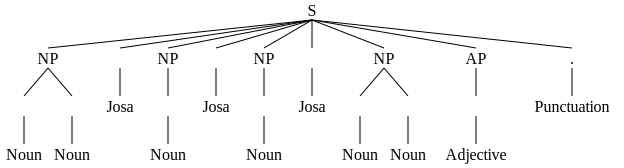

In [87]:
chunks